Mounted at /content/drive


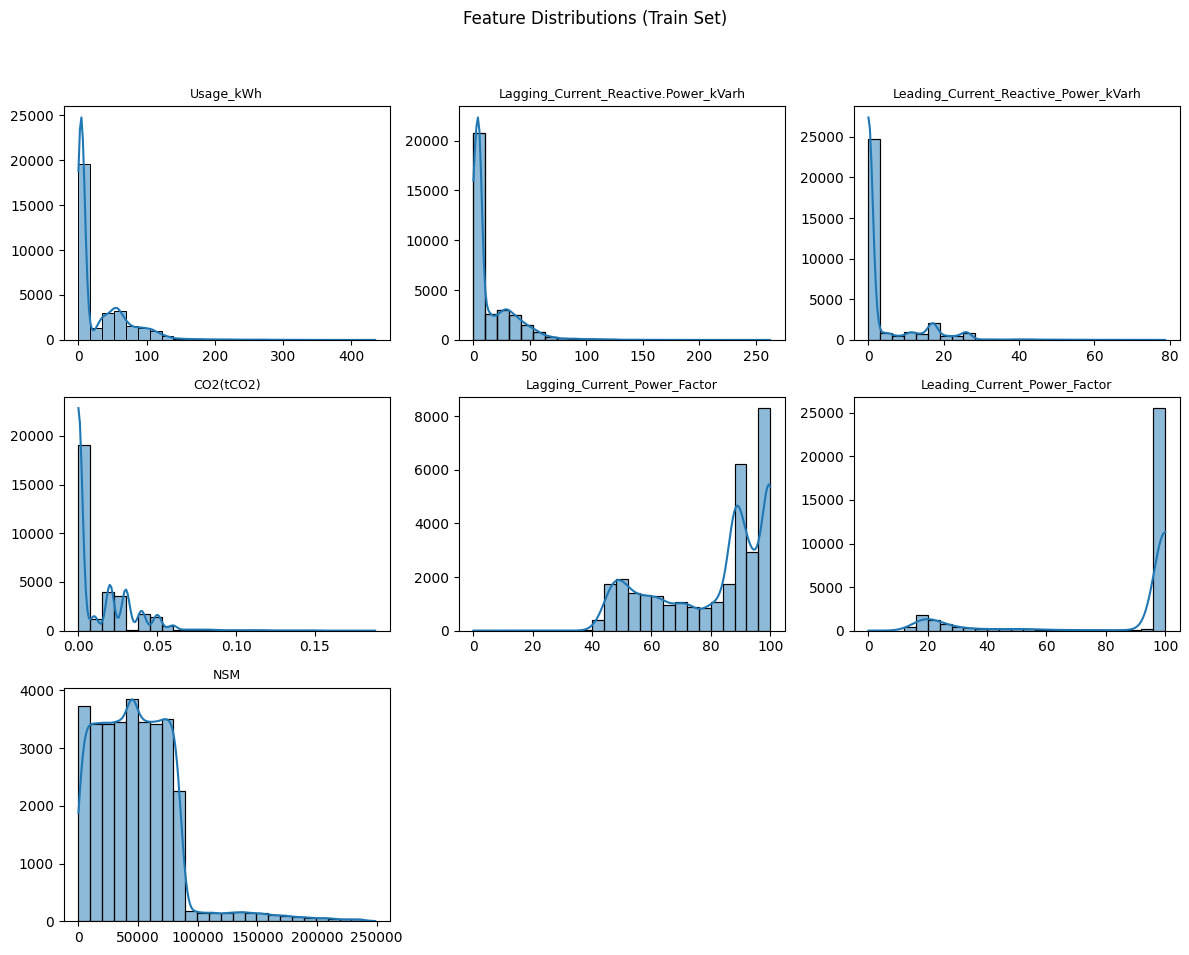

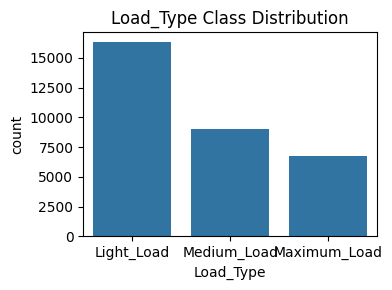

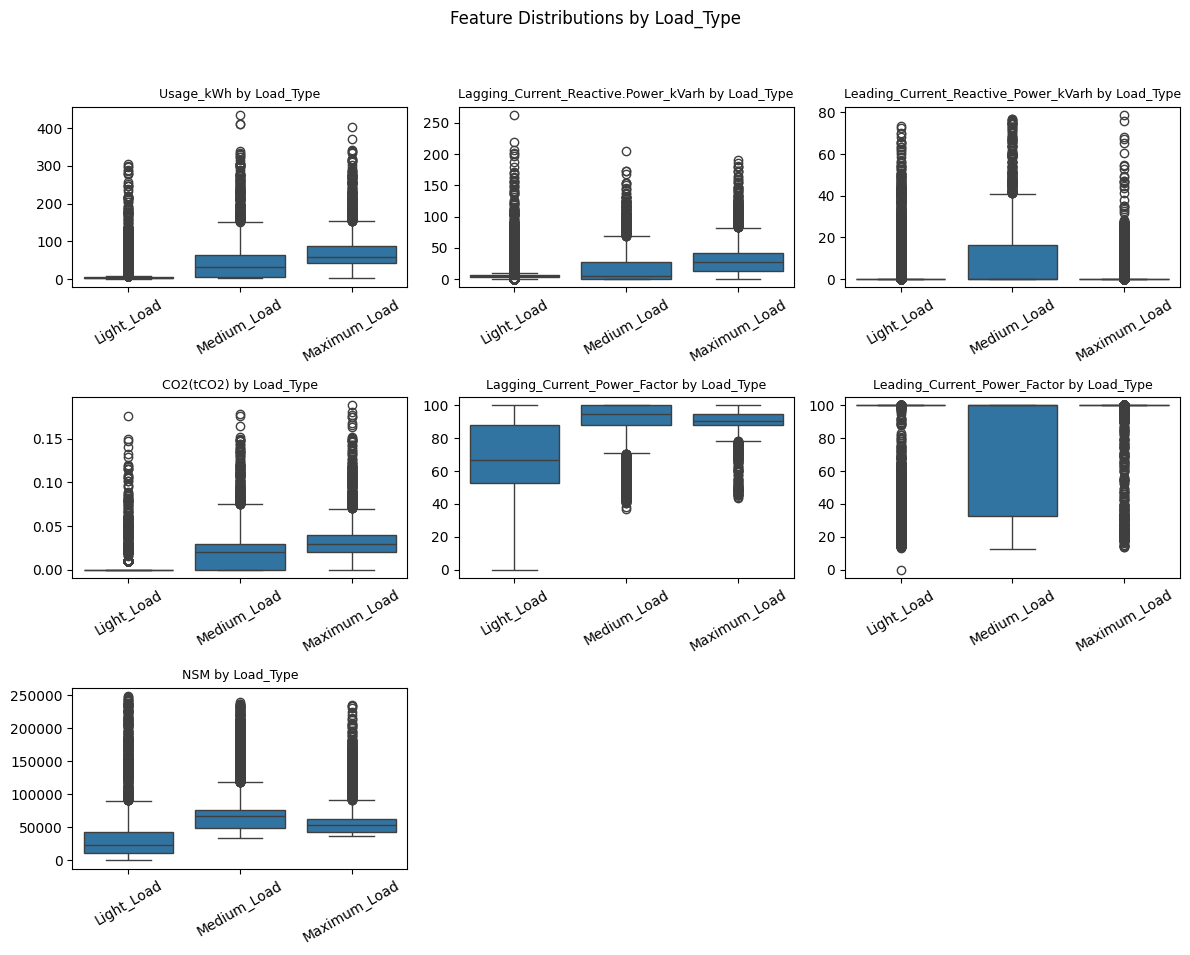

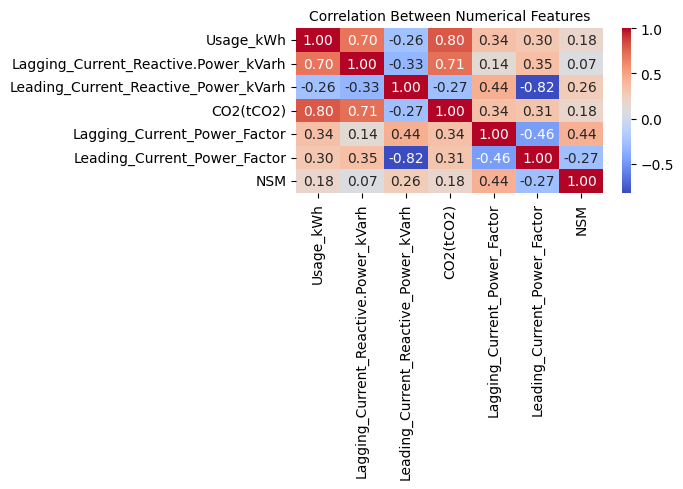

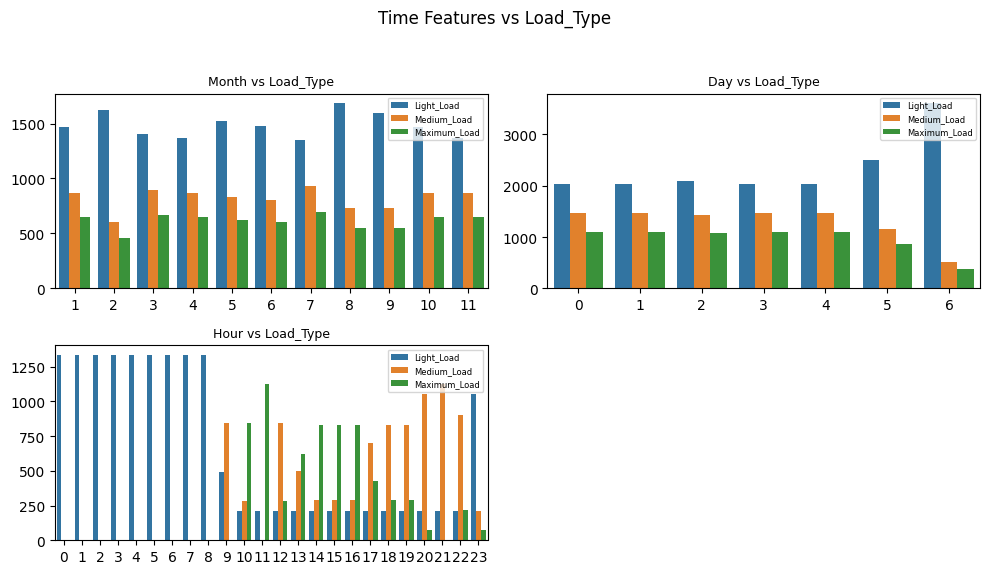

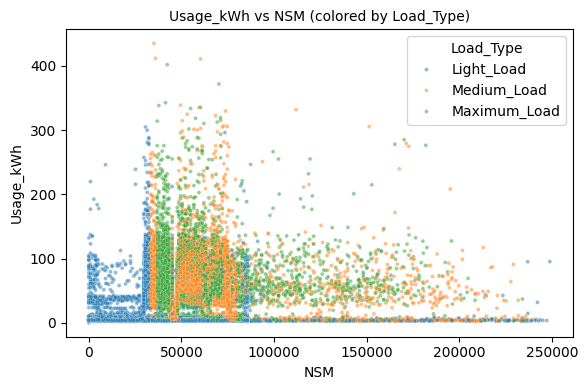

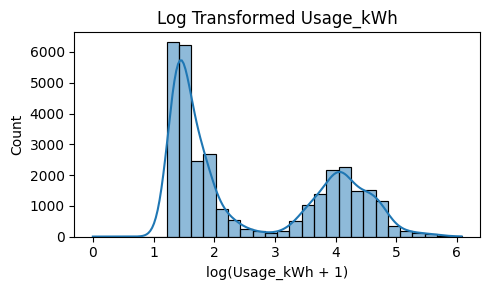

In [1]:
# 03_train_eda.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive

# === 1. MOUNT GOOGLE DRIVE ===
drive.mount('/content/drive')
root_path = '/content/drive/My Drive/load_type_prediction/'
train_path = os.path.join(root_path, 'data/train/power_train.csv')

# === 2. LOAD TRAINING DATA ===
df = pd.read_csv(train_path)
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

# === 3. EXTRACT BASIC TIME FEATURES ===
df['Month'] = df['Date_Time'].dt.month
df['Hour'] = df['Date_Time'].dt.hour
df['Day'] = df['Date_Time'].dt.dayofweek  # 0=Mon, 6=Sun

# === 4. DISTRIBUTIONS OF CONTINUOUS FEATURES ===
continuous_features = [
    'Usage_kWh',
    'Lagging_Current_Reactive.Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh',
    'CO2(tCO2)',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor',
    'NSM'
]

plt.figure(figsize=(12, 10))
for i, col in enumerate(continuous_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, bins=25)
    plt.title(col, fontsize=9)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()
plt.suptitle('Feature Distributions (Train Set)', fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# === 5. LOAD_TYPE DISTRIBUTION ===
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='Load_Type')
plt.title('Load_Type Class Distribution')
plt.tight_layout()
plt.show()

# === 6. BOXPLOTS: CONTINUOUS FEATURES vs Load_Type ===
plt.figure(figsize=(12, 10))
for i, col in enumerate(continuous_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x='Load_Type', y=col)
    plt.title(f'{col} by Load_Type', fontsize=9)
    plt.xticks(rotation=30)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()
plt.suptitle('Feature Distributions by Load_Type', fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# === 7. CORRELATION HEATMAP ===
plt.figure(figsize=(7, 5))
sns.heatmap(df[continuous_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numerical Features", fontsize=10)
plt.tight_layout()
plt.show()

# === 8. TIME-BASED CATEGORICAL FEATURES ===
time_features = ['Month', 'Day', 'Hour']
plt.figure(figsize=(10, 6))
for i, col in enumerate(time_features):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df, x=col, hue='Load_Type')
    plt.title(f'{col} vs Load_Type', fontsize=9)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=0)
    plt.legend(loc='upper right', fontsize=6)
    plt.tight_layout()
plt.suptitle('Time Features vs Load_Type', fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# === 9. NSM vs Usage_kWh by Load_Type ===
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='NSM', y='Usage_kWh', hue='Load_Type', alpha=0.5, s=8)
plt.title('Usage_kWh vs NSM (colored by Load_Type)', fontsize=10)
plt.tight_layout()
plt.show()

# === 10. LOG TRANSFORMATION CHECK (OPTIONAL) ===
plt.figure(figsize=(5, 3))
sns.histplot(np.log1p(df['Usage_kWh']), bins=30, kde=True)
plt.title('Log Transformed Usage_kWh')
plt.xlabel('log(Usage_kWh + 1)')
plt.tight_layout()
plt.show()
